# sciklearn 非线性模型

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.preprocessing import StandardScaler

from sklearn.cross_validation import train_test_split

iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
sc = StandardScaler()
sc.fit(X_train)
iris = datasets.load_iris()

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

D:\libs\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

z = np.arange(-7,7,0.1)

In [3]:
phi_z = sigmoid(z)

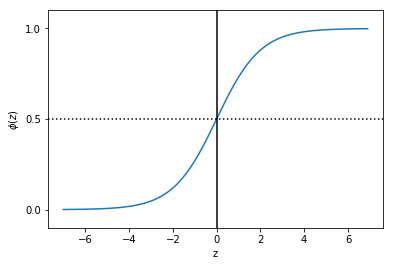

In [4]:
plt.plot(z,phi_z)
plt.axvline(0.0,color='k')
plt.axhspan(0.0,1.0,facecolor='1.0',alpha=1.0,ls='dotted')
plt.axhline(y=0.5,ls='dotted',color='k')
plt.yticks([0.0,0.5,1.0])
plt.ylim(-0.1,1.1)
plt.xlabel('z')
plt.ylabel('$\phi(z)$')
plt.show()

In [5]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0,random_state=0)
lr.fit(X_train_std,y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [6]:
from sklearn.svm import SVC 
svm = SVC(kernel='linear',C=1.0,random_state=0)
svm.fit(X_train_std,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, slpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],edgecolors='black',
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',edgecolors='black',
                    alpha=1.0, linewidth=1, marker='o',
                    s=55, label='test set')

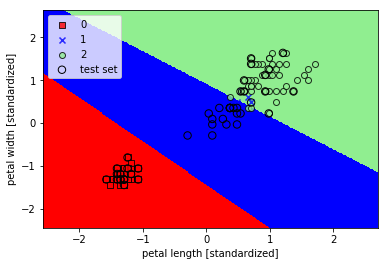

In [8]:
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train,y_test))

plot_decision_regions(X=X_combined_std,
                     y=y_combined,
                     classifier=svm,
                     test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

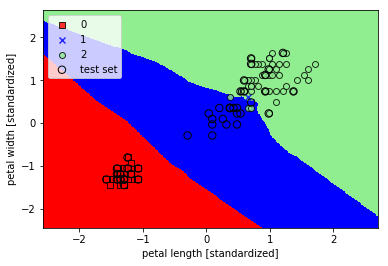

In [9]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5,p=2,metric='minkowski')
knn.fit(X_train_std,y_train)

plot_decision_regions(X=X_combined_std,
                     y=y_combined,
                     classifier=knn,
                     test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [11]:
#选择有意义的特征 L1
import pandas as pd
#df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty='l1')
lr = LogisticRegression(penalty='l1',C=0.1)
lr.fit(X_train_std,y_train)
print('Training accuracy: ',lr.score(X_train_std,y_train))
print('Test accuracy: ',lr.score(X_test_std,y_test))
lr.intercept_
lr.coef_

Training accuracy:  0.7238095238095238
Test accuracy:  0.6222222222222222


array([[-1.84461132,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  1.50477462]])

In [12]:
import matplotlib.pylab as plt
fig=plt.figure

In [13]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header = None)
df_wine.columns=['Class label','Alcohol','Malic acid','Ash','Alcalinity of ash',
                'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins',
                'Color intensity','Hue','0D280/0D315 of diluted wines','Proline']
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,0D280/0D315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [14]:
np.unique(df_wine['Class label'])
from sklearn.cross_validation import train_test_split
X,y = df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=0)

In [15]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

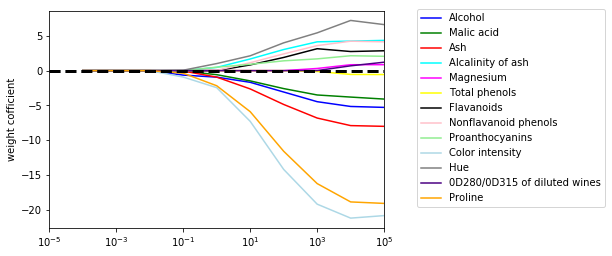

In [16]:
ax = plt.subplot(111)
colors=['blue','green','red','cyan','magenta',
        'yellow','black','pink','lightgreen',
        'lightblue','gray','indigo','orange']
weights,params=[],[]

for c in np.arange(-4,6,dtype=float):
    lr = LogisticRegression(penalty='l1',C=10**c,random_state=0)
    lr.fit(X_train_std,y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
    
weights = np.array(weights)
for column,color in zip(range(weights.shape[1]),colors):
    plt.plot(params,weights[:,column],
             label=df_wine.columns[column+1],color=color)
    
plt.axhline(0,color='black',linestyle='--',linewidth=3)
plt.xlim([10**(-5),10**5])
plt.ylabel('weight cofficient')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',bbox_to_anchor=(1.38,1.03),ncol=1,fancybox=True)
plt.show()


In [17]:
lr = LogisticRegression(penalty='l1',C=0.1)
lr.fit(X_train_std,y_train)
lr.intercept_
lr.coef_

array([[ 0.28034742,  0.        ,  0.        , -0.02805093,  0.        ,
         0.        ,  0.71005572,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.23617014],
       [-0.64397101, -0.06881195, -0.05719639,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.92680453,
         0.06014936,  0.        , -0.37101959],
       [ 0.        ,  0.06112135,  0.        ,  0.        ,  0.        ,
         0.        , -0.63639746,  0.        ,  0.        ,  0.49826329,
        -0.35844985, -0.57087189,  0.        ]])

In [18]:
#SBS 算法
from sklearn.base import clone 
from itertools import combinations
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

In [19]:
class SBS():
    def __init__(self,estimator,k_features,scoring=accuracy_score,test_size = 0.25,random_state = 1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
        
    def fit(self,X,y):
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = self.test_size,random_state = self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train,y_train,X_test,y_test,self.indices_)
        self.scores_ = [score]
        
        while dim>self.k_features:
            scores=[]
            subsets=[]
            
            for p in combinations(self.indices_,r = dim - 1):
                score = self._calc_score(X_train,y_train,X_test,y_test,p)
                scores.append(score)
                subsets.append(p)
            
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -=1
            self.scores_.append(scores[best])
            
        self.k_score_ = self.scores_[-1]
        
        return self
    
    def transform(self,X):
        return X[:,self.indices_]

    def _calc_score(self,X_train,y_train,X_test,y_test,indices):
        self.estimator.fit(X_train[:,indices],y_train)
        y_pred = self.estimator.predict(X_test[:,indices])
        score = self.scoring(y_test,y_pred)
        return score

In [20]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
knn = KNeighborsClassifier(n_neighbors=2)
sbs = SBS(knn,k_features=1)
sbs.fit(X_train_std,y_train)

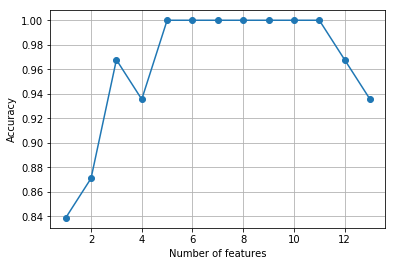

In [21]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat,sbs.scores_,marker='o')
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

In [22]:
k5 = list(sbs.subsets_[8])
print(df_wine.columns[1:][k5])
k5 ,  

Index(['Alcohol', 'Malic acid', 'Alcalinity of ash', 'Hue', 'Proline'], dtype='object')


([0, 1, 3, 10, 12],)

In [23]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=10000,random_state = 0,n_jobs=-1)
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [24]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d %-*s %f"%(f+1,30,feat_labels[f],importances[indices[f]]))

 1 Alcohol                        0.182483
 2 Malic acid                     0.158610
 3 Ash                            0.150948
 4 Alcalinity of ash              0.131987
 5 Magnesium                      0.106589
 6 Total phenols                  0.078243
 7 Flavanoids                     0.060718
 8 Nonflavanoid phenols           0.032033
 9 Proanthocyanins                0.025400
10 Color intensity                0.022351
11 Hue                            0.022078
12 0D280/0D315 of diluted wines   0.014645
13 Proline                        0.013916


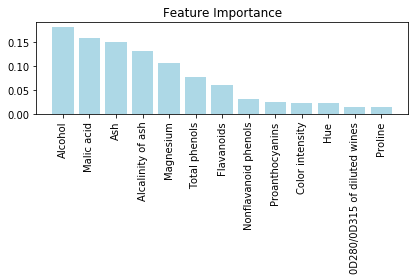

In [25]:
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),
        importances[indices],
       color='lightblue',
       align ='center') 
plt.xticks(range(X_train.shape[1]),feat_labels,rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.show()

In [26]:
#LDA

In [29]:
#Python 核PCA
from scipy.spatial.distance import pdist,squareform
from scipy import exp
from scipy.linalg import eigh
def rbf_kernel_pca(X,gamma,n_components):
    """
    RBF kernel PCA implementation
    """
    #Cacculate pariwise suqared Euclidean distances
    sq_dists = pdist(X,'sqeuclidean')
    #Convert pairwise distances into a square matrix
    mat_sq_dists = squareform(sq_dists)
    #Compute the symmetric kernel matrix
    K = exp(-gamma*mat_sq_dists)
    #Center the kernel matrix
    N = K.shape[0]
    one_n = np.ones((N,N))/N
    K = K - one_n.dot(K) - K.dot(one_n)+one_n.dot(K).dot(one_n)
    #Obtaining eigenparis from the K'
    eigvals,eigvecs = eigh(K)
    #Collect the top k eigenvectors(projected samples)
    X_pc = np.column_stack((eigvecs[:,-i]for i in range(1,n_components+1)))
    return X_pc

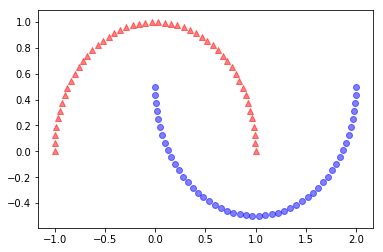

In [31]:
#待处理数据
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=100,random_state=123)
plt.scatter(X[y==0,0],X[y==0,1],color='red',marker='^',alpha=0.5)
plt.scatter(X[y==1,0],X[y==1,1],color='blue',marker='o',alpha=0.5)
plt.show()

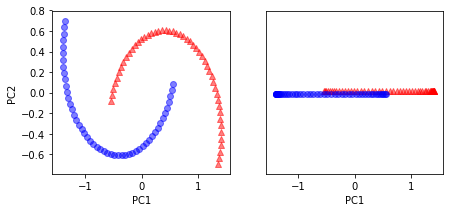

In [33]:
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(7,3))
ax[0].scatter(X_spca[y==0,0],X_spca[y==0,1],
             color='red',marker='^',alpha=0.5)
ax[0].scatter(X_spca[y==1,0],X_spca[y==1,1],
             color='blue',marker='o',alpha=0.5)
ax[1].scatter(X_spca[y==0,0],np.zeros((50,1))+0.02,
             color='red',marker='^',alpha=0.5)
ax[1].scatter(X_spca[y==1,0],np.zeros((50,1))-0.02,
             color='blue',marker='o',alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

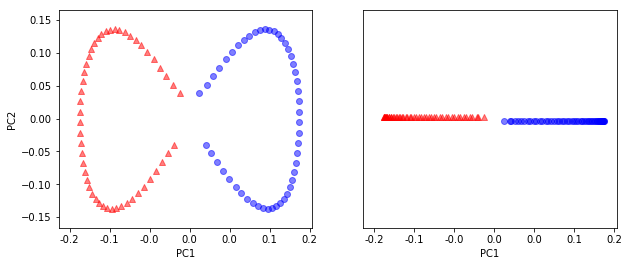

In [37]:
from matplotlib.ticker import FormatStrFormatter
#gamma 需要手动调参
X_kpca = rbf_kernel_pca(X,gamma=15,n_components=2)
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
ax[0].scatter(X_kpca[y==0,0],X_kpca[y==0,1],
             color='red',marker='^',alpha=0.5)
ax[0].scatter(X_kpca[y==1,0],X_kpca[y==1,1],
             color='blue',marker='o',alpha=0.5)
ax[1].scatter(X_kpca[y==0,0],np.zeros((50,1))+0.02,
             color='red',marker='^',alpha=0.5)
ax[1].scatter(X_kpca[y==1,0],np.zeros((50,1))-0.02,
             color='blue',marker='o',alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
ax[0].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
plt.show()

In [38]:
#新的数据点映射
from scipy.spatial.distance import pdist,squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X,gamma,n_commponents):
    sq_dists = pdist(X,'sqeuclidean')
    
    mat_sq_dists = squareform(sq_dists)
    K = exp(-gamma*mat_sq_dists)
    N = K.shape[0]
    one_n = np.ones((N,N))/N
    K=K-one_n.dot(K) - K.dot(one_n)+one_n.dot(K).dot(one_n)
    
    eigvals,eigvecs = eigh(K)
    
    alphas = np.column_stack((eigvecs[:,-1] for i in range(1,n_commponents+1)))
    lambdas = [eigvals[-i] for i in range(1,n_commponents+1)]
    
    return alphas,lambdas